<a href="https://colab.research.google.com/github/Smart-Pigs/Depth-Images/blob/main/Dataset_Preproc_CROPPING_RESIZING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Make sure you have these folders as shortcuts in your drive -  
#/content/gdrive/MyDrive/DEPTH_INDIVIDUAL/

In [1]:
#Mount Google Drive 
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


### Starter Code

In [4]:
!cp /content/gdrive/MyDrive/Morota-video-data/DEPTH_INDIVIDUAL/WEEK1-2.zip .

In [ ]:
!cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/WEEK3-4.zip .

In [ ]:
!cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/WEEK5-6.zip .

In [ ]:
!cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/WEEK7-8.zip .

In [ ]:
!cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/WEEK9-10.zip .

In [5]:
!unzip -qq WEEK1-2.zip -d .

In [ ]:
!unzip -qq WEEK3-4.zip -d .

In [ ]:
!unzip -qq WEEK5-6.zip -d .

In [ ]:
!unzip -qq WEEK7-8.zip -d .

In [ ]:
!unzip -qq WEEK9-10.zip -d .

In [17]:
!cp /content/gdrive/MyDrive/Morota-video-data/SEGMENTED_INDIVIDUAL/SQUARE/SQUARE_WEEK1-10_512_masks.zip .

In [18]:
!unzip -qq SQUARE_WEEK1-10_512_masks.zip -d .

warning [SQUARE_WEEK1-10_512_masks.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [SQUARE_WEEK1-10_512_masks.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #105682).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


In [7]:
import pandas as pd

In [85]:
coord = pd.read_csv('/content/gdrive/MyDrive/Morota-video-data/DEPTH_INDIVIDUAL/bounding_box_coordinates_Week1-10.csv')

In [9]:
# Filter out only specific weeks to see
#substrings = ['Week1/', 'Week2/']

#coord = coord[coord['Image Path'].str.contains('|'.join(substrings))]

In [86]:
coord

Image Path      ymin      xmin  \
0       Week1/20210922/20210922_3330_a/_Depth_3492.png  0.001267  0.764544   
1       Week1/20210922/20210922_3330_a/_Depth_3490.png  0.004127  0.810725   
2       Week1/20210922/20210922_3330_a/_Depth_3497.png  0.000315  0.688500   
3       Week1/20210922/20210922_3330_a/_Depth_3493.png  0.004384  0.688143   
4       Week1/20210922/20210922_3330_a/_Depth_3500.png  0.001882  0.806674   
...                                                ...       ...       ...   
105505  Week10/20211119/20211119_3384/_Depth_11835.png  0.685842  0.010098   
105506  Week10/20211119/20211119_3384/_Depth_11787.png  0.105972  0.594343   
105507  Week10/20211119/20211119_3384/_Depth_11414.png  0.191815  0.087216   
105508  Week10/20211119/20211119_3384/_Depth_11226.png  0.176211  0.044284   
105509  Week10/20211119/20211119_3384/_Depth_12169.png  0.000000  0.251760   

            ymax      xmax  
0       0.487195  0.998094  
1       0.495004  1.000000  
2       0.457620  0.980688  
3       0.498894  0.903726  
4       0.522424  0.989724  
...          ...       ...  
105505  0.995609  0.475975  
105506  0.566600  0.999736  
105507  0.522346  0.592331  
105508  0.952705  0.259842  
105509  0.656009  0.492675  

[105510 rows x 5 columns]

### Taking an example image

In [ ]:
#sam = coord[coord['Image Path'] == 'Week9/20211112/20211112_3342/_Depth_2470.png']

In [12]:
sample = coord.sample(1).iloc[0].tolist()

In [13]:
image_path = sample[0]
y_min = float(sample[1])
x_min = float(sample[2])
y_max = float(sample[3])
x_max = float(sample[4])

In [14]:
#image_path = list(sam['Image Path'])[0]
#y_min = list(sam['ymin'])[0]
#x_min = list(sam['xmin'])[0]
#y_max = list(sam['ymax'])[0]
#x_max = list(sam['xmax'])[0]

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(720, 1280, 3)


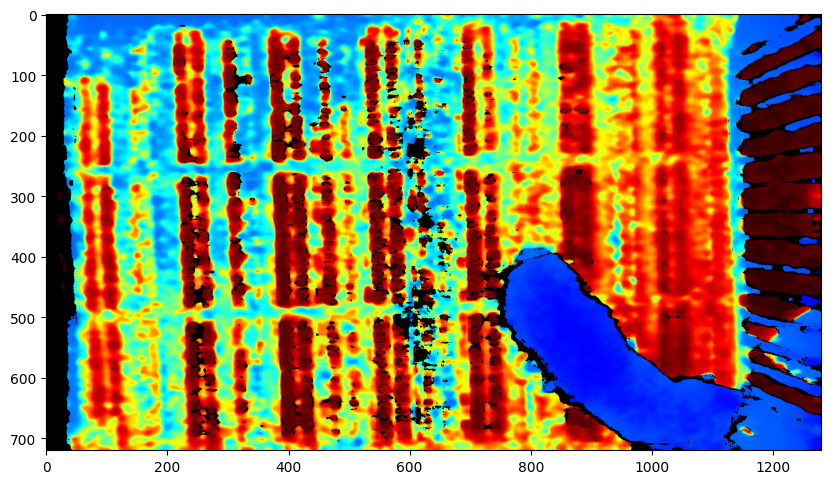

In [16]:
image = cv2.imread(image_path)
print(image.shape)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
image_path

'Week2/20211003/20211003_3342a/_Depth_4924.png'

In [34]:
720/2.5

288.0

In [30]:
def remove_border(img, border_ratio=0.21875):
    h, w = img.shape[:2]
    top_border = int(h * border_ratio)
    bottom_border = int(h * border_ratio)
    cropped_img = img[top_border:h-bottom_border, :]
    return cropped_img

(288, 512)


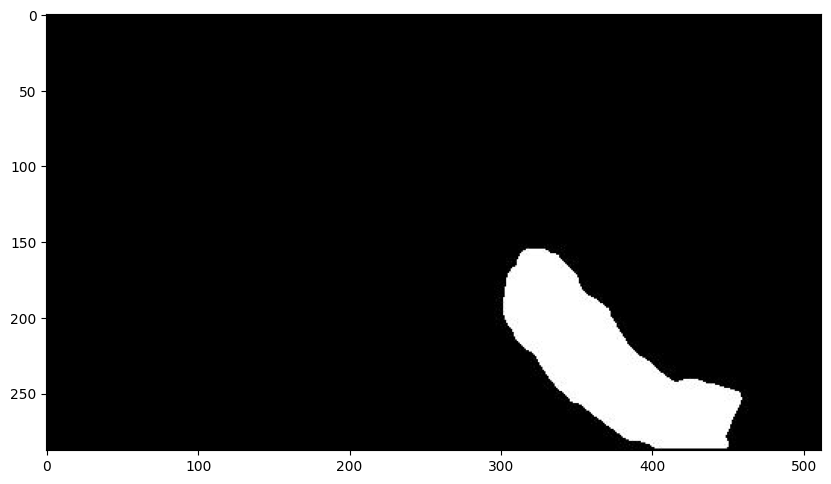

In [31]:
image = cv2.imread('SQUARE_WEEK1-10_512_masks/'+image_path.replace('png','jpg'),cv2.IMREAD_GRAYSCALE)
image = remove_border(image)
print(image.shape)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.show()

In [65]:
def display_image_with_box(ymin, xmin, ymax, xmax, image_path):
    # Load the image from the file path
    image = cv2.imread(image_path)
    print(image.shape)
    flag = 0
    if image.shape[0] == 512:
      image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      image = remove_border(image)
      flag = 1
    image_copy = image.copy()

    # Get the height and width of the image
    height= image.shape[0]
    width= image.shape[1]

    # Unnormalize the bounding box coordinates
    ymin_pixel = int(ymin * height)
    xmin_pixel = int(xmin * width)
    ymax_pixel = int(ymax * height)
    xmax_pixel = int(xmax * width)

    print((xmin_pixel, ymin_pixel), (xmax_pixel, ymax_pixel))

    # Draw the bounding box on the image
    if flag == 1:
      image_with_box = cv2.rectangle(image, (xmin_pixel, ymin_pixel), (xmax_pixel, ymax_pixel), (255, 255, 255), thickness=2)
    else:
      image_with_box = cv2.rectangle(image, (xmin_pixel, ymin_pixel), (xmax_pixel, ymax_pixel), (255, 255, 255), thickness=5)

    # Display the image with the bounding box overlaid
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
    plt.show()

    # Crop out the square bounding box
    rect_box = image_copy[ymin_pixel:ymax_pixel, xmin_pixel:xmax_pixel]
    print(rect_box.shape)
    
    # Display the cropped image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(rect_box, cv2.COLOR_BGR2RGB))
    plt.show()

(720, 1280, 3)
(734, 380) (1181, 720)


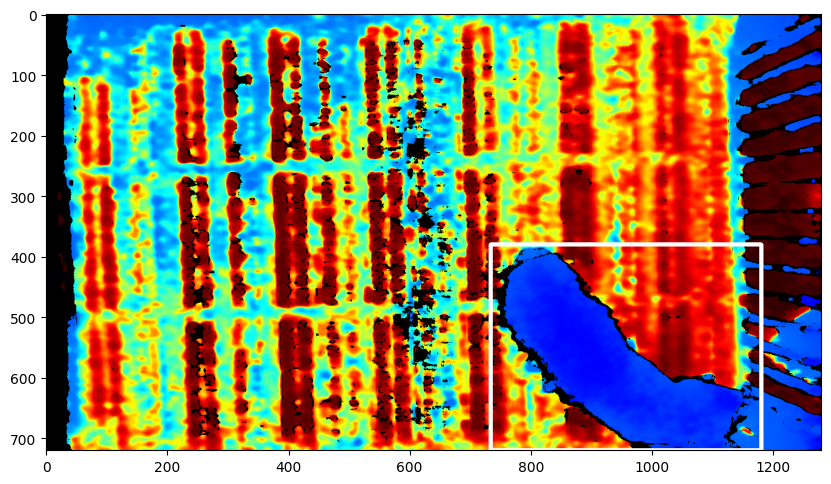

(340, 447, 3)


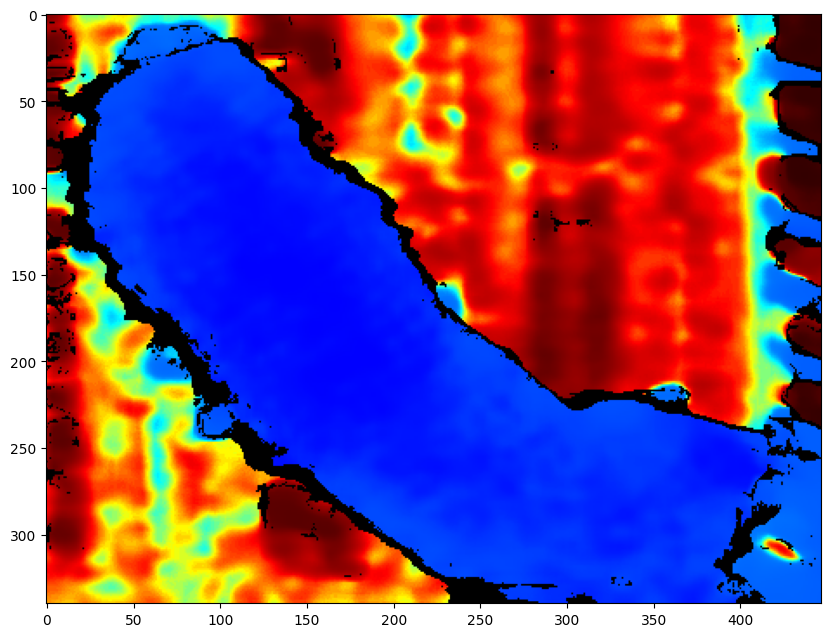

In [66]:
display_image_with_box(y_min, x_min, y_max, x_max, image_path)

(512, 512, 3)
(293, 152) (472, 288)


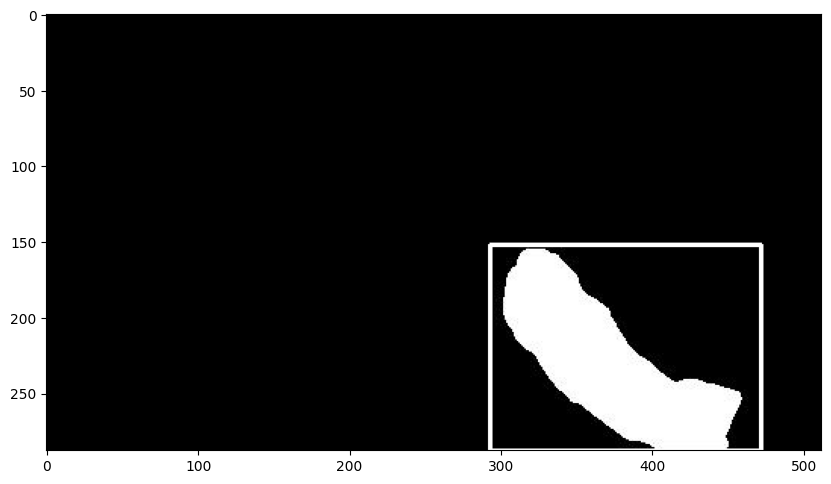

(136, 179)


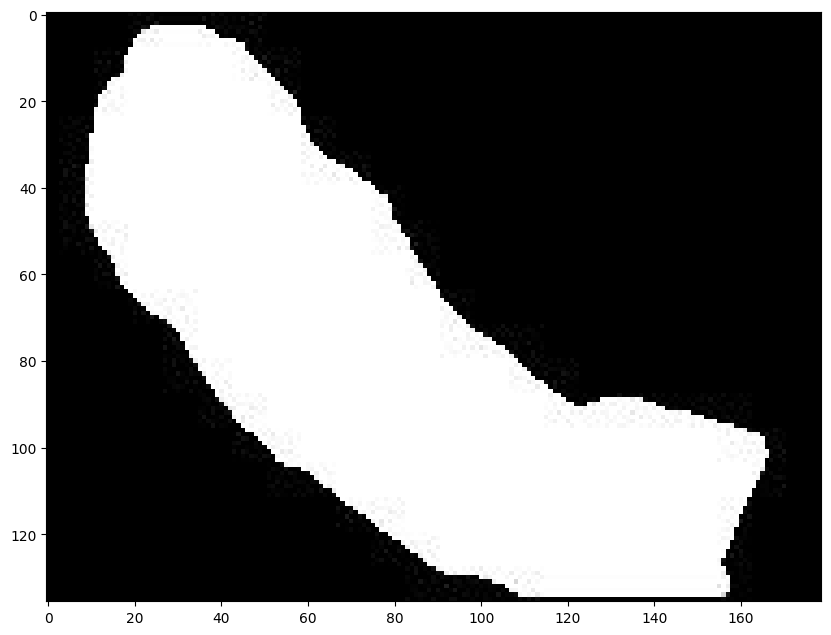

In [67]:
display_image_with_box(y_min, x_min, y_max, x_max, 'SQUARE_WEEK1-10_512_masks/'+image_path.replace('png','jpg'))

### Prototyping for a single image (plotting unshifted square bounding box on original image and cropped out)

In [68]:
def display_image_with_box(ymin, xmin, ymax, xmax, image_path):
    # Load the image from the file path
    image = cv2.imread(image_path)
    flag = 0
    if image.shape[0] == 512:
      image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      image = remove_border(image)
      flag = 1
    image_copy = image.copy()

    # Get the height and width of the image
    height = image.shape[0]
    width = image.shape[1]

    # Unnormalize the bounding box coordinates
    ymin_pixel = int(ymin * height)
    xmin_pixel = int(xmin * width)
    ymax_pixel = int(ymax * height)
    xmax_pixel = int(xmax * width)

    # Compute the width and height of the bounding box
    width_pixel = xmax_pixel - xmin_pixel
    height_pixel = ymax_pixel - ymin_pixel

    # Determine whether to adjust the box vertically or horizontally
    if width_pixel > height_pixel:
        # Adjust the box vertically
        difference = width_pixel - height_pixel
        ymin_pixel -= difference // 2
        ymax_pixel += difference // 2
    else:
        # Adjust the box horizontally
        difference = height_pixel - width_pixel
        xmin_pixel -= difference // 2
        xmax_pixel += difference // 2

    # Make sure the box is still inside the image
    ymin_pixel = np.clip(ymin_pixel, 0, height)
    ymax_pixel = np.clip(ymax_pixel, 0, height)
    xmin_pixel = np.clip(xmin_pixel, 0, width)
    xmax_pixel = np.clip(xmax_pixel, 0, width)

    # Draw the bounding box on the image
    if flag == 1:
      image_with_box = cv2.rectangle(image, (xmin_pixel, ymin_pixel), (xmax_pixel, ymax_pixel), (255,255,255), thickness=2)
    else:
      image_with_box = cv2.rectangle(image, (xmin_pixel, ymin_pixel), (xmax_pixel, ymax_pixel), (255,255,255), thickness=5)
    print((xmin_pixel, ymin_pixel), (xmax_pixel, ymax_pixel))

    # Display the image with the bounding box overlaid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
    plt.show()

    # Crop out the square bounding box
    square_box = image_copy[ymin_pixel:ymax_pixel, xmin_pixel:xmax_pixel]
    print(square_box.shape)

    # Display the cropped image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(square_box, cv2.COLOR_BGR2RGB))
    plt.show()

(734, 327) (1181, 720)


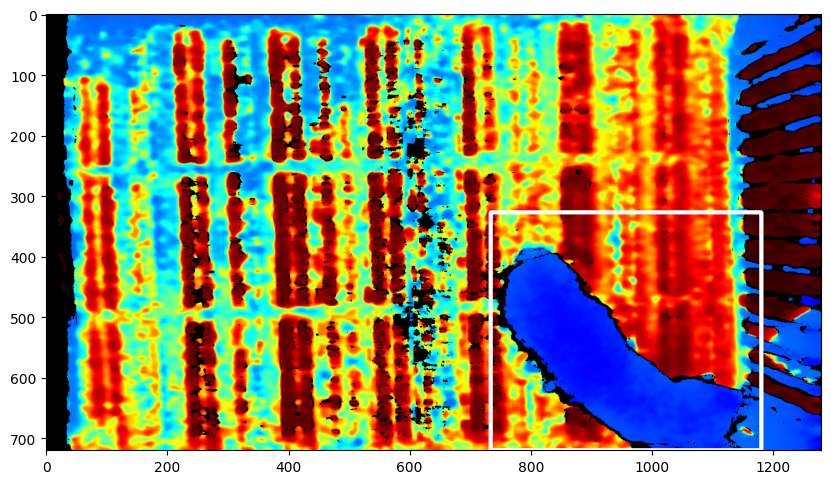

(393, 447, 3)


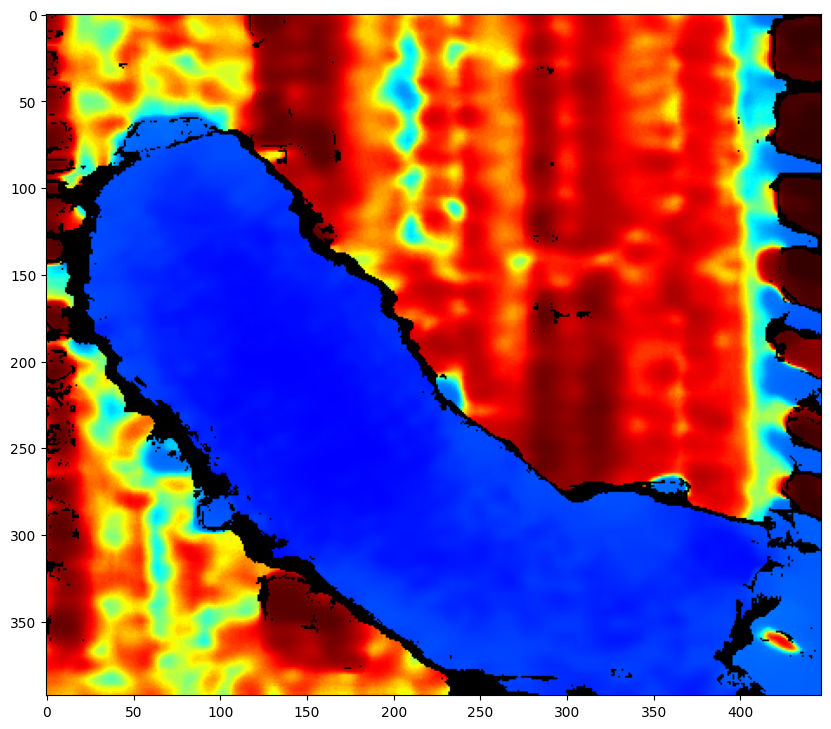

In [69]:
display_image_with_box(y_min, x_min, y_max, x_max, image_path)

(293, 131) (472, 288)


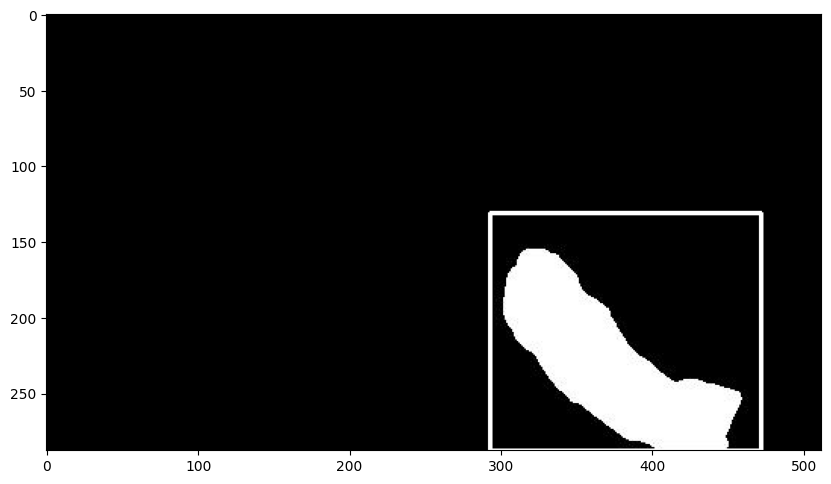

(157, 179)


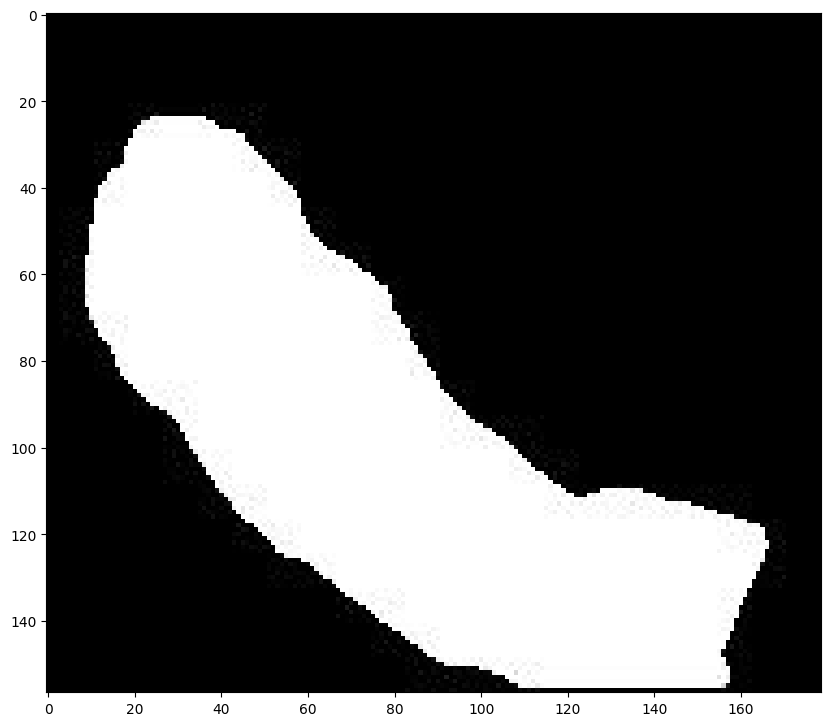

In [70]:
display_image_with_box(y_min, x_min, y_max, x_max, 'SQUARE_WEEK1-10_512_masks/'+image_path.replace('png','jpg'))

### Prototyping for a single image (plotting translated square bounding box on original image and cropped out)

In [75]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_image_with_square_bbox(image_path, y_min, x_min, y_max, x_max):
    # Load the image from the file path
    image = cv2.imread(image_path)
    flag = 0
    if image.shape[0] == 512:
      image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      image = remove_border(image)
      flag = 1
    image_copy = image.copy()
    
    # Get the height and width of the image
    image_height = image.shape[0]
    image_width = image.shape[1]
    
    # Compute the width and height of the rectangular bounding box
    box_height = (y_max - y_min) * image_height
    box_width = (x_max - x_min) * image_width
    
    # Determine the center of the rectangular bounding box
    center_y = int((y_min + y_max) * image_height / 2)
    center_x = int((x_min + x_max) * image_width / 2)
    
    # Compute the size of the square bounding box
    box_size = int(max(box_height, box_width))
    
    # Compute the coordinates of the square bounding box
    ymin_new = max(center_y - box_size // 2, 0)
    xmin_new = max(center_x - box_size // 2, 0)
    ymax_new = ymin_new + box_size
    xmax_new = xmin_new + box_size
    
    # If the square bounding box is outside the image, shift it towards the inside
    if ymax_new > image_height:
        ymin_new -= ymax_new - image_height
        ymax_new = image_height
    if xmax_new > image_width:
        xmin_new -= xmax_new - image_width
        xmax_new = image_width
    if ymin_new < 0:
        ymax_new += ymin_new
        ymin_new = 0
    if xmin_new < 0:
        xmax_new += xmin_new
        xmin_new = 0

    # Draw the bounding box on the image
    if flag == 1:
      image_with_box = cv2.rectangle(image, (xmin_new, ymin_new), (xmax_new, ymax_new), (255, 255, 255), thickness=2)
    else:
      image_with_box = cv2.rectangle(image, (xmin_new, ymin_new), (xmax_new, ymax_new), (255, 255, 255), thickness=5)
    print((xmin_new, ymin_new), (xmax_new, ymax_new))
    
    # Display the image with the bounding box overlaid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
    plt.show()

    # Crop image to square bounding box
    cropped_image = image_copy[ymin_new:ymax_new, xmin_new:xmax_new]
    print(cropped_image.shape)
    # Display the cropped image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()

(734, 274) (1180, 720)


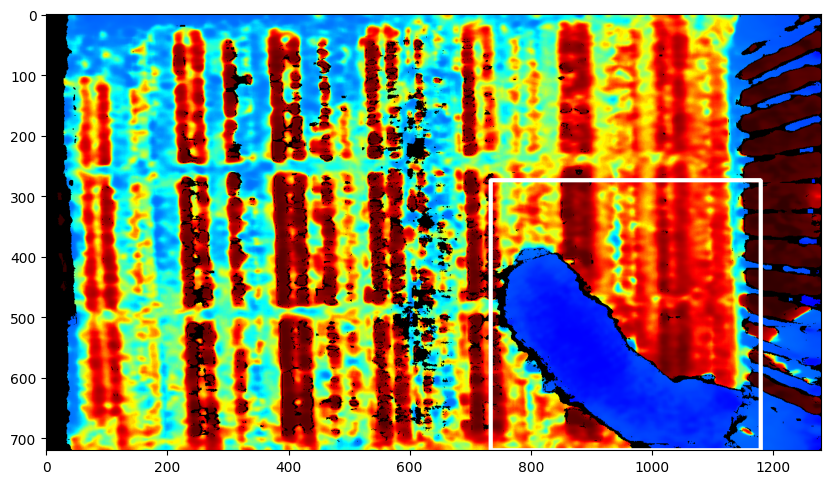

(446, 446, 3)


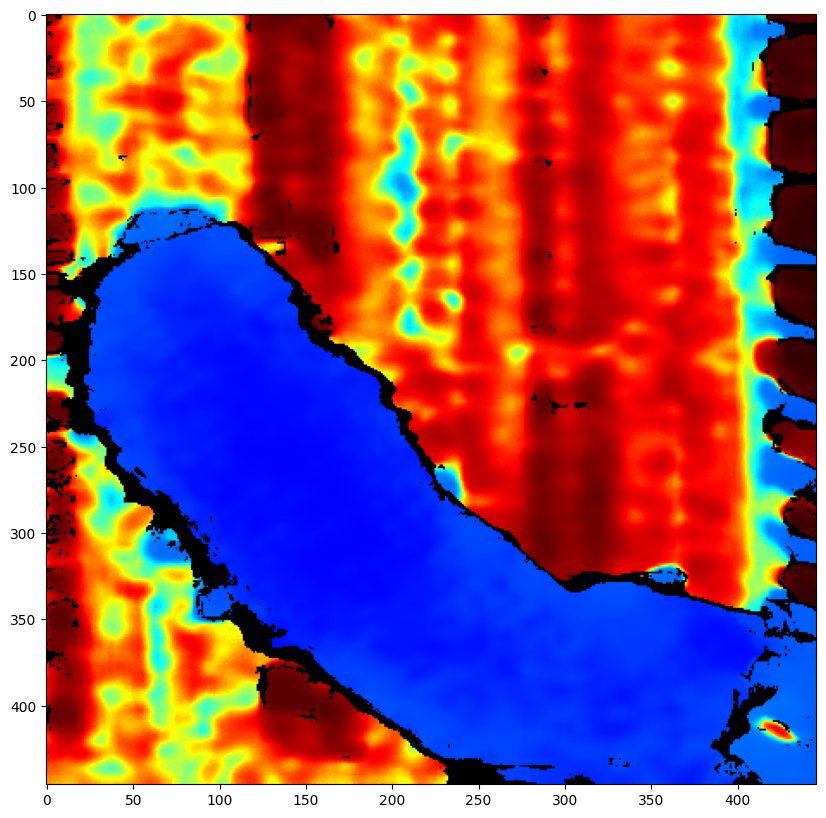

In [76]:
display_image_with_square_bbox(image_path, y_min, x_min, y_max, x_max)

(294, 110) (472, 288)


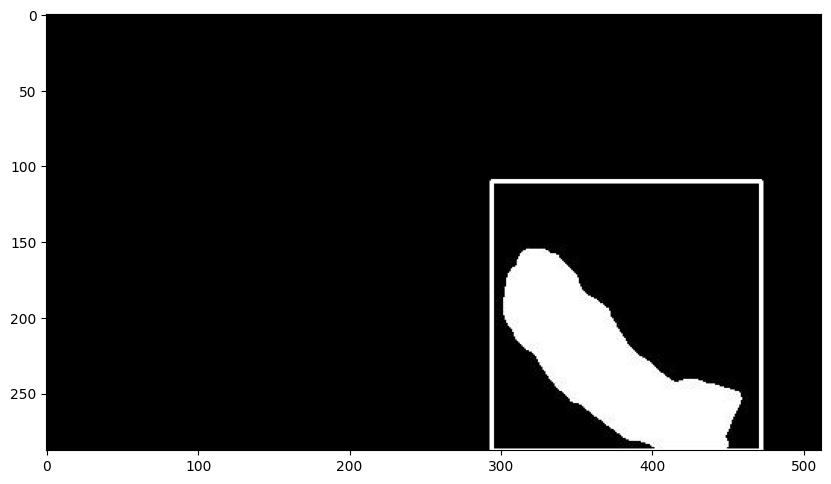

(178, 178)


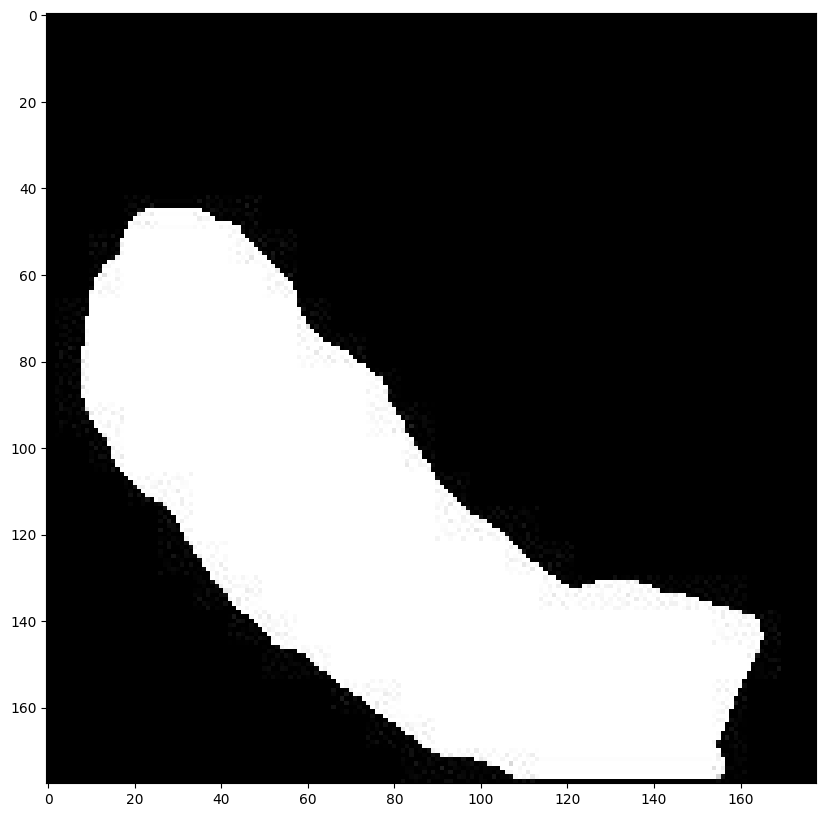

In [78]:
display_image_with_square_bbox('SQUARE_WEEK1-10_512_masks/'+image_path.replace('png','jpg'), y_min, x_min, y_max, x_max)

### Prototyping for a single image (plotting translated square bounding box on original image and cropped out - given size)

In [81]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_image_with_square_bbox(image_path, y_min, x_min, y_max, x_max, box_size):
    # Load the image from the file path
    image = cv2.imread(image_path)
    flag = 0
    if image.shape[0] == 512:
      image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      image = remove_border(image)
      flag = 1
    image_copy = image.copy()
    
    # Get the height and width of the image
    image_height = image.shape[0]
    image_width = image.shape[1]
    
    # Compute the width and height of the rectangular bounding box
    box_height = (y_max - y_min) * image_height
    box_width = (x_max - x_min) * image_width
    
    # Determine the center of the rectangular bounding box
    center_y = int((y_min + y_max) * image_height / 2)
    center_x = int((x_min + x_max) * image_width / 2)
    
    # Compute the size of the square bounding box
    if box_size > max(box_height, box_width):
        box_size = int(box_size)
    else:
        box_size = int(box_size)
    
    # Compute the coordinates of the square bounding box
    ymin_new = max(center_y - box_size // 2, 0)
    xmin_new = max(center_x - box_size // 2, 0)
    ymax_new = ymin_new + box_size
    xmax_new = xmin_new + box_size
    
    # If the square bounding box is outside the image, shift it towards the inside
    if ymax_new > image_height:
        ymin_new -= ymax_new - image_height
        ymax_new = image_height
    if xmax_new > image_width:
        xmin_new -= xmax_new - image_width
        xmax_new = image_width
    if ymin_new < 0:
        ymax_new += ymin_new
        ymin_new = 0
    if xmin_new < 0:
        xmax_new += xmin_new
        xmin_new = 0

    # Draw the bounding box on the image
    if flag == 1:
      image_with_box = cv2.rectangle(image, (xmin_new, ymin_new), (xmax_new, ymax_new), (255, 255, 255), thickness=2)
    else: 
      image_with_box = cv2.rectangle(image, (xmin_new, ymin_new), (xmax_new, ymax_new), (0, 0, 0), thickness=5)
    print((xmin_new, ymin_new), (xmax_new, ymax_new))
    
    # Display the image with the bounding box overlaid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
    plt.show()

    # Crop image to square bounding box
    cropped_image = image_copy[ymin_new:ymax_new, xmin_new:xmax_new]
    print(cropped_image.shape)

    # Display the cropped image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()

(560, 0) (1280, 720)


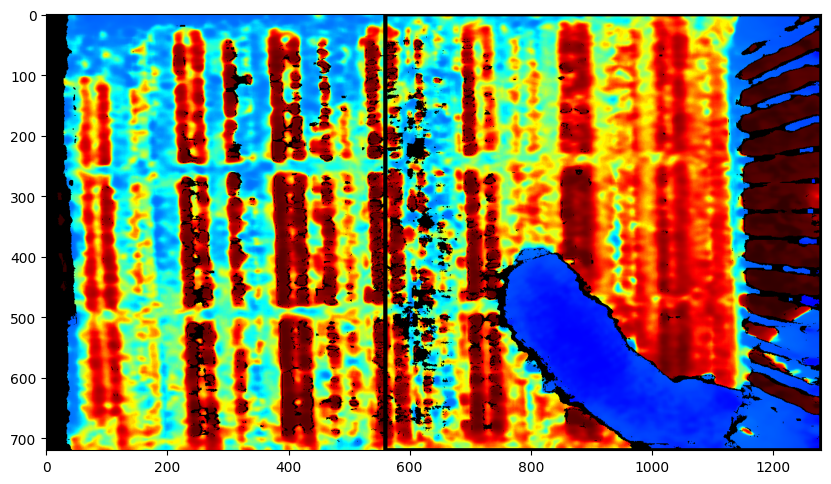

(720, 720, 3)


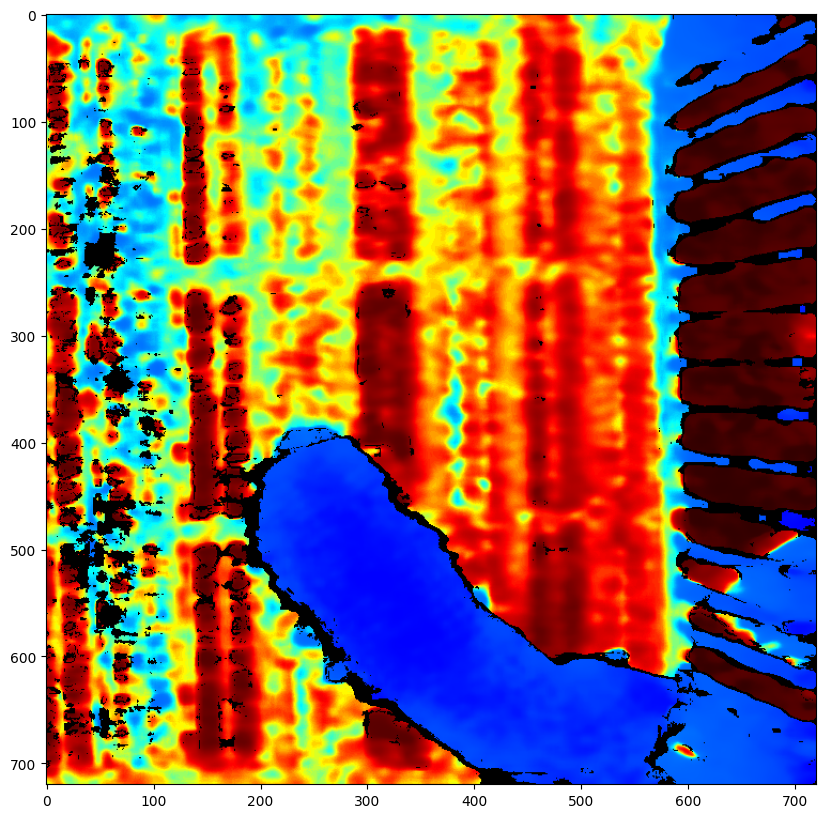

In [82]:
display_image_with_square_bbox(image_path, y_min, x_min, y_max, x_max, 720)

(224, 0) (512, 288)


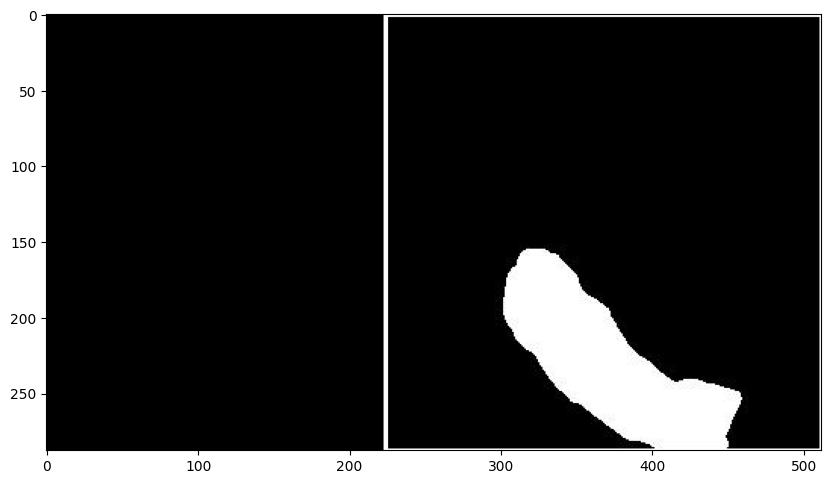

(288, 288)


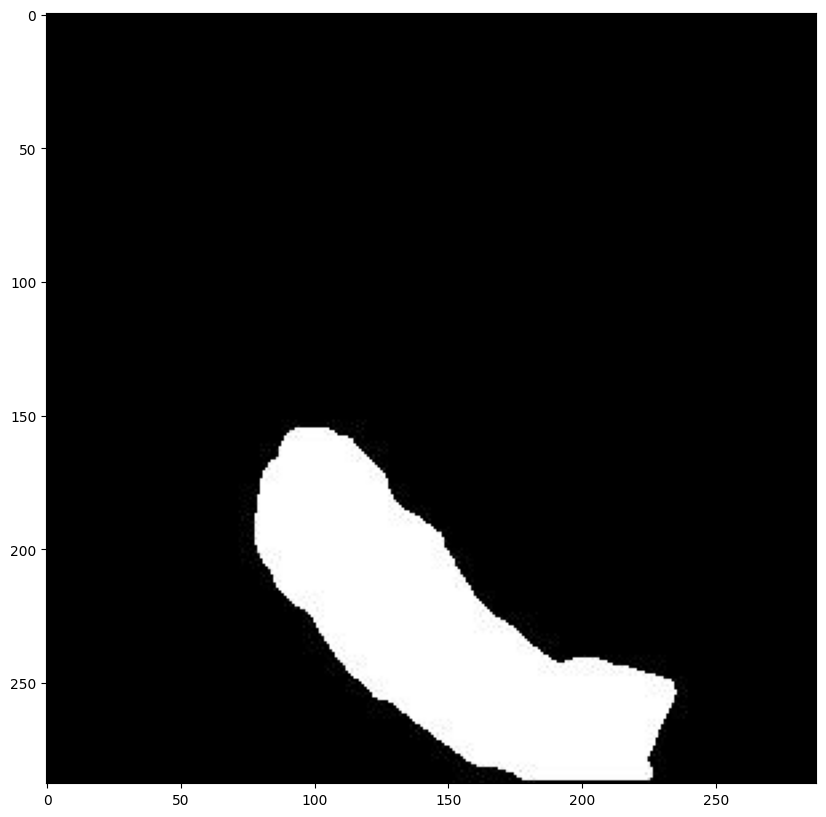

In [84]:
display_image_with_square_bbox('SQUARE_WEEK1-10_512_masks/'+image_path.replace('png','jpg'), y_min, x_min, y_max, x_max, 288)

### Finding out size of largest square bounding box

In [ ]:
import numpy as np

def compute_square_size(y_min, x_min, y_max, x_max):
    # Load the image from the file path
    
    # Get the height and width of the image
    image_height, image_width, _ = image.shape
    
    # Compute the width and height of the rectangular bounding box
    box_height = (y_max - y_min) * image_height
    box_width = (x_max - x_min) * image_width
    
    # Determine the center of the rectangular bounding box
    center_y = int((y_min + y_max) * image_height / 2)
    center_x = int((x_min + x_max) * image_width / 2)
    
    # Compute the size of the square bounding box
    box_size = int(max(box_height, box_width))
    
    # Compute the coordinates of the square bounding box
    ymin_new = max(center_y - box_size // 2, 0)
    xmin_new = max(center_x - box_size // 2, 0)
    ymax_new = ymin_new + box_size
    xmax_new = xmin_new + box_size
    
    # If the square bounding box is outside the image, shift it towards the inside
    if ymax_new > image_height:
        ymin_new -= ymax_new - image_height
        ymax_new = image_height
    if xmax_new > image_width:
        xmin_new -= xmax_new - image_width
        xmax_new = image_width
    if ymin_new < 0:
        ymax_new += ymin_new
        ymin_new = 0
    if xmin_new < 0:
        xmax_new += xmin_new
        xmin_new = 0
    
    return image[ymin_new:ymax_new, xmin_new:xmax_new].shape[0]

In [ ]:
image = np.zeros([720, 1280, 3])

In [ ]:
sizes = []
image_paths = []

for index, sample in coord.iterrows():
  image_path = sample[0]
  y_min = float(sample[1])
  x_min = float(sample[2])
  y_max = float(sample[3])
  x_max = float(sample[4])
  size = compute_square_size(y_min, x_min, y_max, x_max)
  sizes.append(size)
  image_paths.append(image_path)

In [ ]:
sizes, image_paths = (list(t) for t in zip(*sorted(zip(sizes, image_paths))))

In [ ]:
sizes[-1]

720

In [ ]:
image_paths[-1]

'Week9/20211112/20211112_3342/_Depth_2470.png'

### Removing images with pig at the edges

In [ ]:
coord_pixels = coord.copy()

In [ ]:
coord_pixels['ymax'] = coord_pixels['ymax']*720

In [ ]:
coord_pixels['ymin'] = coord_pixels['ymin']*720

In [ ]:
coord_pixels['xmax'] = coord_pixels['xmax']*1280

In [ ]:
coord_pixels['xmin'] = coord_pixels['xmin']*1280

In [ ]:
df = coord_pixels.copy()

lower_bound = 1.3
upper_bound = 1.3

df = df[(df['ymin'] > lower_bound) & (df['ymin'] < 720-upper_bound) &
        (df['ymax'] > lower_bound) & (df['ymax'] < 720-upper_bound) &
        (df['xmin'] > lower_bound) & (df['xmin'] < 1280-upper_bound) &
        (df['xmax'] > lower_bound) & (df['xmax'] < 1280-upper_bound)]

In [ ]:
coord_clean = df.copy()

In [ ]:
coord_clean['ymax'] = coord_clean['ymax']/720
coord_clean['ymin'] = coord_clean['ymin']/720
coord_clean['xmax'] = coord_clean['xmax']/1280
coord_clean['xmin'] = coord_clean['xmin']/1280

In [ ]:
coord_clean.to_csv('/content/gdrive/MyDrive/DEPTH_INDIVIDUAL/clean_bounding_box_coordinates_Week1-10.csv',index=False)

### Cropping out images and saving

In [88]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def crop_square_box(image_path, y_min, x_min, y_max, x_max, box_size):
    # Load the image from the file path
    image = cv2.imread(image_path)
    if image.shape[0] == 512:
      image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      image = remove_border(image)
    
    # Get the height and width of the image
    image_height = image.shape[0]
    image_width = image.shape[1]
    
    # Compute the width and height of the rectangular bounding box
    box_height = (y_max - y_min) * image_height
    box_width = (x_max - x_min) * image_width
    
    # Determine the center of the rectangular bounding box
    center_y = int((y_min + y_max) * image_height / 2)
    center_x = int((x_min + x_max) * image_width / 2)
    
    # Compute the size of the square bounding box
    if box_size > max(box_height, box_width):
        box_size = int(box_size)
    else:
        box_size = int(box_size)
    
    # Compute the coordinates of the square bounding box
    ymin_new = max(center_y - box_size // 2, 0)
    xmin_new = max(center_x - box_size // 2, 0)
    ymax_new = ymin_new + box_size
    xmax_new = xmin_new + box_size
    
    # If the square bounding box is outside the image, shift it towards the inside
    if ymax_new > image_height:
        ymin_new -= ymax_new - image_height
        ymax_new = image_height
    if xmax_new > image_width:
        xmin_new -= xmax_new - image_width
        xmax_new = image_width
    if ymin_new < 0:
        ymax_new += ymin_new
        ymin_new = 0
    if xmin_new < 0:
        xmax_new += xmin_new
        xmin_new = 0

    # Crop image to square bounding box
    cropped_image = image[ymin_new:ymax_new, xmin_new:xmax_new]

    return cropped_image

In [ ]:
from tqdm import tqdm
import os

for index, sample in tqdm(coord.iterrows(), total=len(coord)):
  image_path = sample[0]
  y_min = float(sample[1])
  x_min = float(sample[2])
  y_max = float(sample[3])
  x_max = float(sample[4])
  img = crop_square_box(image_path, y_min, x_min, y_max, x_max, box_size=720)
  cv2.imwrite(image_path.replace('.png','.jpg'),img)
  os.remove(image_path)

100%|██████████| 23329/23329 [20:54<00:00, 18.59it/s]


In [91]:
from tqdm import tqdm
import os

for index, sample in tqdm(coord.iterrows(), total=len(coord)):
  image_path = sample[0]
  y_min = float(sample[1])
  x_min = float(sample[2])
  y_max = float(sample[3])
  x_max = float(sample[4])
  img = crop_square_box('SQUARE_WEEK1-10_512_masks/'+image_path.replace('png','jpg'), y_min, x_min, y_max, x_max, box_size=288)
  cv2.imwrite('SQUARE_WEEK1-10_512_masks/'+image_path.replace('png','jpg'),img)
  #os.remove(image_path)

100%|██████████| 105510/105510 [06:45<00:00, 260.41it/s]


In [92]:
!mv SQUARE_WEEK1-10_512_masks CROPPED_WEEK1-10_288_masks

In [ ]:
!zip -r CROPPED_WEEK1-10_288_masks.zip CROPPED_WEEK1-10_288_masks

In [ ]:
!zip -r CROPPED_WEEK1-10_720.zip Week1 Week2 Week3 Week4 Week5 Week6 Week7 Week8 Week9 Week10

In [ ]:
!mv CROPPED_WEEK1-10_720.zip /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/CROPPED/

In [94]:
!mv CROPPED_WEEK1-10_288_masks.zip /content/gdrive/MyDrive/Morota-video-data/SEGMENTED_INDIVIDUAL/CROPPED/

### Resizing

In [ ]:
import cv2
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import os
from glob import glob

dim = (256,256)

for PATH in ['CROPPED_WEEK1-10_288_masks/Week1','CROPPED_WEEK1-10_288_masks/Week2','CROPPED_WEEK1-10_288_masks/Week3','CROPPED_WEEK1-10_288_masks/Week4','CROPPED_WEEK1-10_288_masks/Week5','CROPPED_WEEK1-10_288_masks/Week6','CROPPED_WEEK1-10_288_masks/Week7','CROPPED_WEEK1-10_288_masks/Week8','CROPPED_WEEK1-10_288_masks/Week9','CROPPED_WEEK1-10_288_masks/Week10']:
    print(PATH)
    result = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], '*.jpg'))]
    for img in tqdm(result):
      image = cv2.imread(img)
      os.remove(img)
      image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
      cv2.imwrite(img,image)

Week1


100%|██████████| 1013/1013 [00:22<00:00, 45.44it/s]


Week2


100%|██████████| 5773/5773 [01:45<00:00, 54.47it/s]


Week3


100%|██████████| 11785/11785 [01:54<00:00, 102.76it/s]


Week4


100%|██████████| 9993/9993 [01:38<00:00, 101.73it/s]


Week5


100%|██████████| 9388/9388 [01:26<00:00, 109.11it/s]


Week6


100%|██████████| 13941/13941 [02:36<00:00, 89.17it/s] 


Week7


100%|██████████| 13590/13590 [02:06<00:00, 107.73it/s]


Week8


100%|██████████| 14099/14099 [02:14<00:00, 105.17it/s]


Week9


100%|██████████| 12183/12183 [01:52<00:00, 108.12it/s]


Week10


100%|██████████| 13745/13745 [02:05<00:00, 109.91it/s]


In [99]:
import cv2
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import os
from glob import glob

dim = (256,256)

for PATH in ['CROPPED_WEEK1-10_288_masks/Week1','CROPPED_WEEK1-10_288_masks/Week2','CROPPED_WEEK1-10_288_masks/Week3','CROPPED_WEEK1-10_288_masks/Week4','CROPPED_WEEK1-10_288_masks/Week5','CROPPED_WEEK1-10_288_masks/Week6','CROPPED_WEEK1-10_288_masks/Week7','CROPPED_WEEK1-10_288_masks/Week8','CROPPED_WEEK1-10_288_masks/Week9','CROPPED_WEEK1-10_288_masks/Week10']:
    print(PATH)
    result = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], '*.jpg'))]
    for img in tqdm(result):
      image = cv2.imread(img)
      os.remove(img)
      image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
      cv2.imwrite(img,image)

CROPPED_WEEK1-10_288_masks/Week1


100%|██████████| 1013/1013 [00:04<00:00, 237.00it/s]


CROPPED_WEEK1-10_288_masks/Week2


100%|██████████| 5773/5773 [00:27<00:00, 212.12it/s]


CROPPED_WEEK1-10_288_masks/Week3


100%|██████████| 11785/11785 [00:59<00:00, 197.73it/s]


CROPPED_WEEK1-10_288_masks/Week4


100%|██████████| 9993/9993 [00:47<00:00, 211.21it/s]


CROPPED_WEEK1-10_288_masks/Week5


100%|██████████| 9388/9388 [00:45<00:00, 207.34it/s]


CROPPED_WEEK1-10_288_masks/Week6


100%|██████████| 13941/13941 [01:08<00:00, 204.12it/s]


CROPPED_WEEK1-10_288_masks/Week7


100%|██████████| 13590/13590 [01:06<00:00, 202.96it/s]


CROPPED_WEEK1-10_288_masks/Week8


100%|██████████| 14099/14099 [01:10<00:00, 198.64it/s]


CROPPED_WEEK1-10_288_masks/Week9


100%|██████████| 12183/12183 [01:03<00:00, 193.14it/s]


CROPPED_WEEK1-10_288_masks/Week10


100%|██████████| 13745/13745 [01:11<00:00, 192.46it/s]


In [101]:
!mv CROPPED_WEEK1-10_288_masks CROPPED_WEEK1-10_256_masks

In [102]:
!zip -r CROPPED_WEEK1-10_256_masks.zip CROPPED_WEEK1-10_256_masks

Streaming output truncated to the last 5000 lines.
  adding: CROPPED_WEEK1-10_256_masks/Week3/20211006/20211006_3342/_Depth_3537.jpg (deflated 20%)
  adding: CROPPED_WEEK1-10_256_masks/Week3/20211006/20211006_3342/_Depth_3963.jpg (deflated 20%)
  adding: CROPPED_WEEK1-10_256_masks/Week3/20211006/20211006_3342/_Depth_4440.jpg (deflated 19%)
  adding: CROPPED_WEEK1-10_256_masks/Week3/20211006/20211006_3342/_Depth_5085.jpg (deflated 20%)
  adding: CROPPED_WEEK1-10_256_masks/Week3/20211006/20211006_3342/_Depth_3817.jpg (deflated 24%)
  adding: CROPPED_WEEK1-10_256_masks/Week3/20211006/20211006_3342/_Depth_4003.jpg (deflated 25%)
  adding: CROPPED_WEEK1-10_256_masks/Week3/20211006/20211006_3342/_Depth_4831.jpg (deflated 24%)
  adding: CROPPED_WEEK1-10_256_masks/Week3/20211006/20211006_3342/_Depth_4237.jpg (deflated 22%)
  adding: CROPPED_WEEK1-10_256_masks/Week3/20211006/20211006_3342/_Depth_4796.jpg (deflated 23%)
  adding: CROPPED_WEEK1-10_256_masks/Week3/20211006/20211006_3342/_Depth_517

In [103]:
!mv CROPPED_WEEK1-10_256_masks.zip /content/gdrive/MyDrive/Morota-video-data/SEGMENTED_INDIVIDUAL/CROPPED/

In [ ]:
!zip -r CROPPED_WEEK1-10_256.zip Week1 Week2 Week3 Week4 Week5 Week6 Week7 Week8 Week9 Week10

In [ ]:
!mv CROPPED_WEEK1-10_256.zip /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/CROPPED/